# Import Packages and Reading of Data

In [17]:
import time
import warnings
import pickle
import shap

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from xgboost import XGBClassifier, plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score, RepeatedKFold
from xgboost import plot_importance
from bayes_opt import BayesianOptimization
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")

In [18]:
# Reading of Excel
train_metadata = pd.read_csv('train_dataset_robustness_check.csv')
test_metadata = pd.read_csv('test_dataset_robustness_check.csv')

In [19]:
train_metadata

,protected,verified,location,followers_count,following_count,tweet_count,listed_count,has_profile_image,un_no_of_char,un_special_char,name_no_of_char,name_special_char,des_no_of_usertags,des_no_of_hashtags,des_external_links,has_description,has_url,isBot
0,0,0,0,-0.018926,0.044142,-0.250723,-0.024062,1,-0.694456,0,0.862623,0,-0.181726,1.153584,0,1,0,0
1,0,0,0,-0.019464,-0.343907,-0.229790,-0.026745,1,-1.074072,0,-0.259904,0,-0.181726,-0.171360,0,0,0,1
2,0,0,1,-0.010227,3.238147,-0.132280,0.059086,1,0.064776,0,-0.821167,0,-0.181726,-0.171360,0,1,1,0
3,0,0,0,-0.019400,-0.267341,-0.230425,-0.024062,1,1.583240,0,-0.446991,0,-0.181726,-0.171360,0,0,0,1
4,0,0,1,-0.019149,-0.350867,-0.255932,-0.025850,1,-1.453687,0,1.423886,0,-0.181726,-0.171360,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3312,0,0,1,-0.017840,0.266008,0.343432,-0.025850,1,0.824008,1,-0.259904,0,5.816123,-0.171360,0,1,0,0
3313,0,0,1,-0.019134,0.873313,-0.232693,-0.024062,1,-1.453687,0,0.675535,0,-0.181726,-0.171360,0,0,0,1
3314,0,0,0,-0.018773,-0.193386,-0.254125,-0.026745,1,1.203624,0,-0.821167,0,-0.181726,-0.171360,0,0,0,0
3315,1,0,1,-0.018895,0.031961,-0.188464,-0.025850,1,1.203624,0,1.049710,0,-0.181726,-0.171360,0,1,0,0


In [20]:
test_metadata

,protected,verified,location,followers_count,following_count,tweet_count,listed_count,has_profile_image,un_no_of_char,un_special_char,name_no_of_char,name_special_char,des_no_of_usertags,des_no_of_hashtags,des_external_links,has_description,has_url,isBot
0,0,0,1,-0.018929,-0.045475,-0.084995,-0.026745,1,0.824008,0,-0.821167,0,-0.181726,1.153584,0,1,0,0
1,0,0,1,-0.018791,-0.350867,0.377301,-0.026745,1,1.583240,0,0.862623,0,-0.181726,-0.171360,0,1,0,0
2,0,0,1,-0.019422,-0.298663,-0.245706,-0.025850,1,1.583240,0,-0.446991,0,-0.181726,-0.171360,0,0,0,0
3,0,0,0,-0.019452,-0.296053,-0.232193,-0.025850,1,0.444392,0,-0.821167,0,-0.181726,-0.171360,0,0,0,1
4,0,0,1,-0.019446,-0.344777,-0.205725,-0.026745,1,0.444392,0,0.488447,0,-0.181726,-0.171360,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,0,0,1,-0.019376,-0.350867,-0.157691,-0.003499,1,0.064776,0,-1.195342,0,-0.181726,-0.171360,0,1,1,1
826,0,0,1,-0.019131,0.281669,-0.250992,-0.026745,1,0.064776,0,-0.446991,0,-0.181726,-0.171360,0,0,0,0
827,0,0,0,-0.018550,-0.148142,0.052189,-0.026745,1,-1.453687,0,0.301360,0,-0.181726,-0.171360,0,1,0,1
828,0,0,0,-0.019244,-0.350867,-0.163649,-0.026745,1,-1.833303,0,-1.008254,0,-0.181726,-0.171360,0,0,0,1


In [21]:
x_train = train_metadata.drop(columns = "isBot")
x_test = test_metadata.drop(columns = "isBot")
y_train = train_metadata["isBot"]
y_test = test_metadata["isBot"]

# Robustness Check
The XGBoost Classifier is chosen as the best model as it recorded the highest F1 score.

To ensure our XGBoost model is robust, we further evaluated the final model on a new dataset. 

In [23]:
weight_train = y_train.value_counts()[0] / y_train.value_counts()[1]

In [24]:
# Model (optimal hyperparameters selected by grid search; refer to XGBoost.ipynb for more details)
params_xgb = {'colsample_bytree': 0.7, 'eta': 0.1, 'max_depth': 25, 'subsample': 0.8}
xgb_classifier = XGBClassifier(gamma = 0.1,
                               alpha = 0.5,
                               max_depth = int(params_xgb['max_depth']), 
                               eta = params_xgb['eta'], 
                               subsample = params_xgb['subsample'],
                               colsample_bytree = params_xgb['colsample_bytree'],
                               scale_pos_weight = weight_train,
                               objective = "binary:logistic",
                               eval_metric = "logloss")

In [25]:
%%time

# Fit Model
xgb_model = xgb_classifier.fit(x_train, y_train)

CPU times: user 1.7 s, sys: 47 ms, total: 1.75 s
Wall time: 555 ms


In [27]:
%%time

# y_prediction for the best model
y_pred = xgb_model.predict(x_test)

CPU times: user 14.4 ms, sys: 2.62 ms, total: 17 ms
Wall time: 15.5 ms


In [28]:
# Metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
lg_loss = metrics.log_loss(y_test, y_pred)
print(f'Log Loss: {lg_loss}')
roc_auc = metrics.roc_auc_score(y_test, y_pred)
print(f'ROC AUC: {roc_auc}')
f1_score = metrics.f1_score(y_test, y_pred)
print(f'F1-score: {f1_score}')
precision = metrics.precision_score(y_test, y_pred)
print(f'Precision: {precision}')
recall = metrics.recall_score(y_test, y_pred)
print(f'Recall: {recall}')
report = metrics.classification_report(y_test, y_pred)
print(f'Classification Report: \n {report}')

Accuracy: 0.8590361445783132
Log Loss: 5.080852345212899
ROC AUC: 0.823976079848563
F1-score: 0.7483870967741936
Precision: 0.7532467532467533
Recall: 0.7435897435897436
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       596
           1       0.75      0.74      0.75       234

    accuracy                           0.86       830
   macro avg       0.83      0.82      0.83       830
weighted avg       0.86      0.86      0.86       830



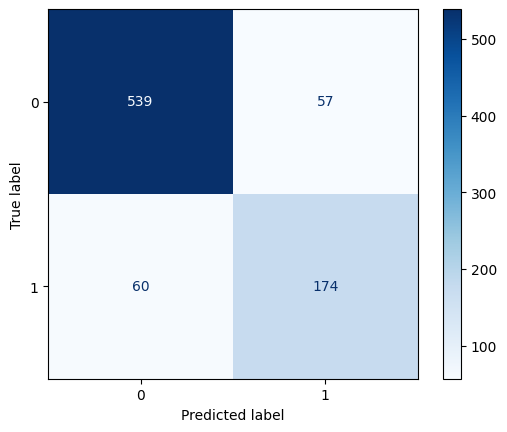

In [31]:
# Confusion Matrix Plot
#metrics.plot_confusion_matrix(xgb_model, x_test, y_test, cmap = "Blues")
#plt.show()
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap = "Blues")
plt.show()

## Feature Importance

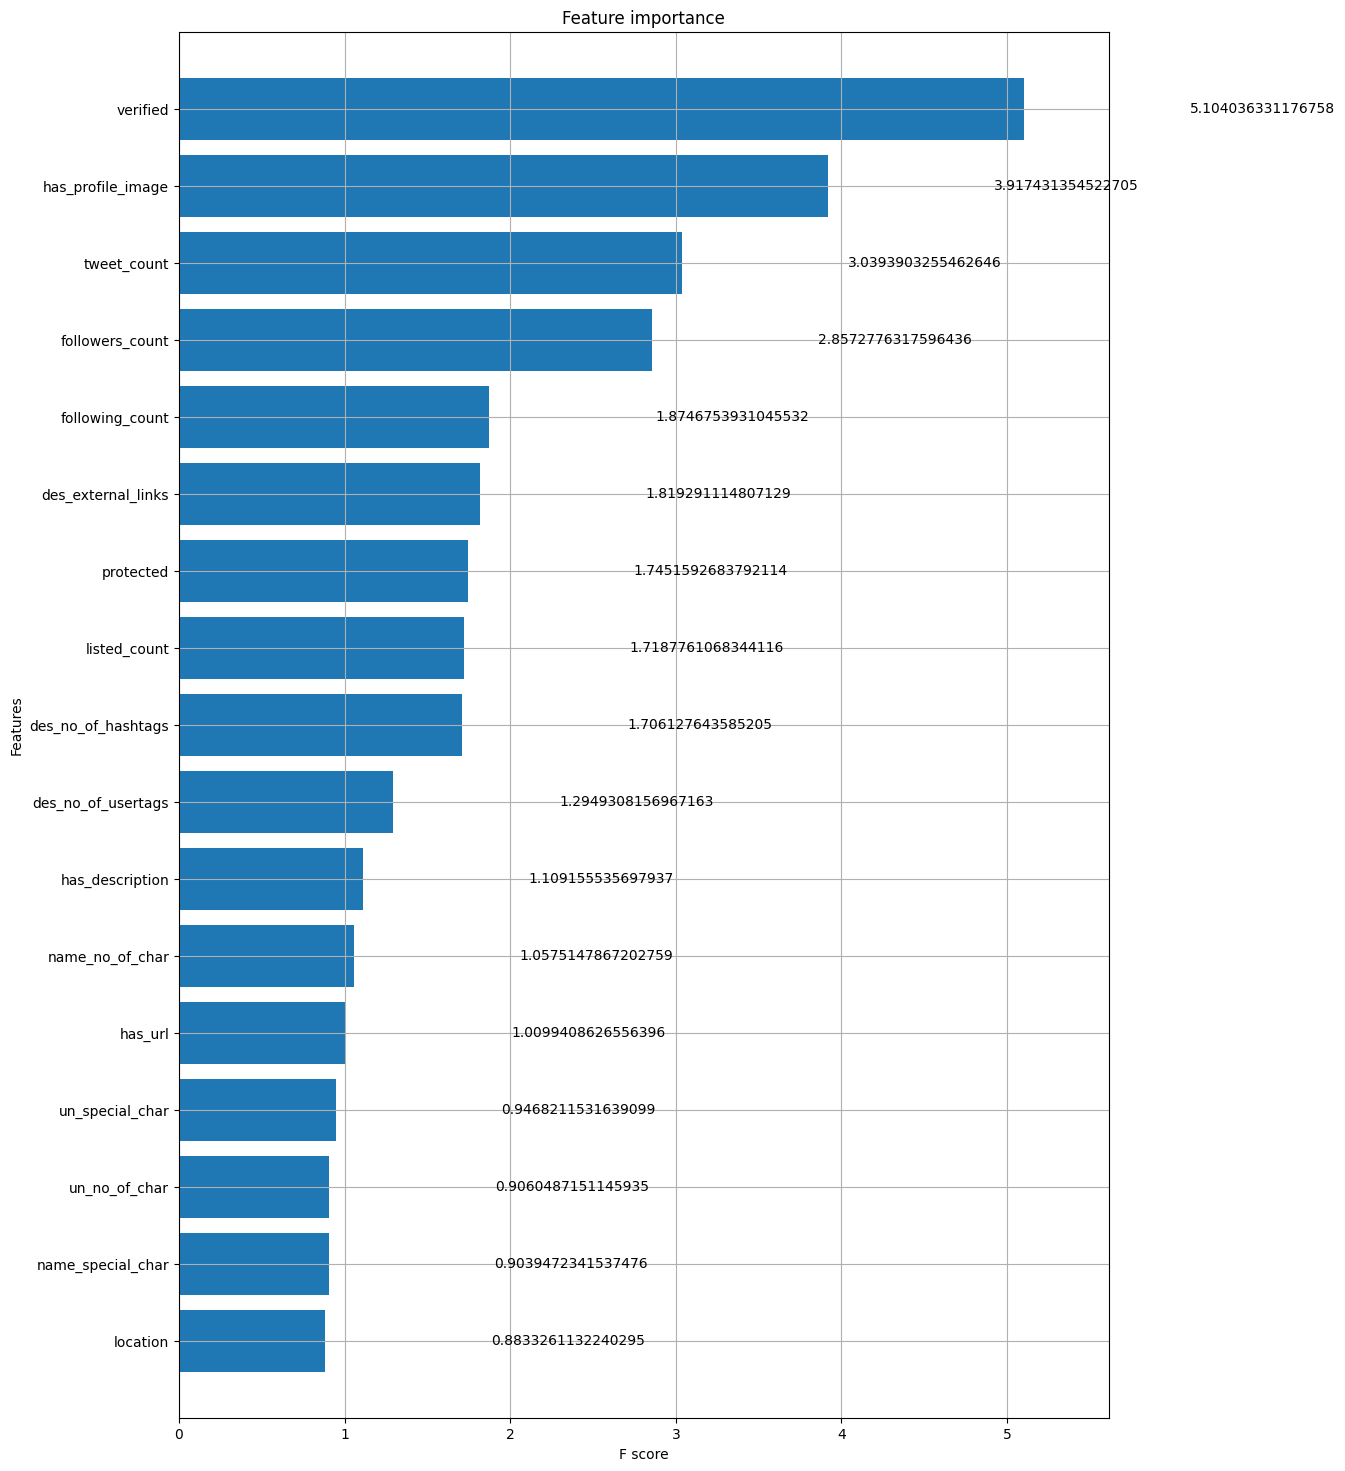

In [34]:
fig, ax = plt.subplots(figsize=(12,18))
plot_importance(xgb_model, importance_type = 'gain', height=0.8, ax=ax)
plt.show()

In [36]:
# Local Level
shap.initjs()
explainer = shap.Explainer(xgb_model.predict_proba, x_train)
shap_values = explainer(x_test.iloc[[555]])
shap_values = shap_values[...,1]
shap.plots.force(shap_values)

In [37]:
xgb_model.predict_proba(x_test.iloc[[555]])

array([[0.91028565, 0.08971433]], dtype=float32)

Permutation explainer: 831it [01:27,  8.55it/s]                                 


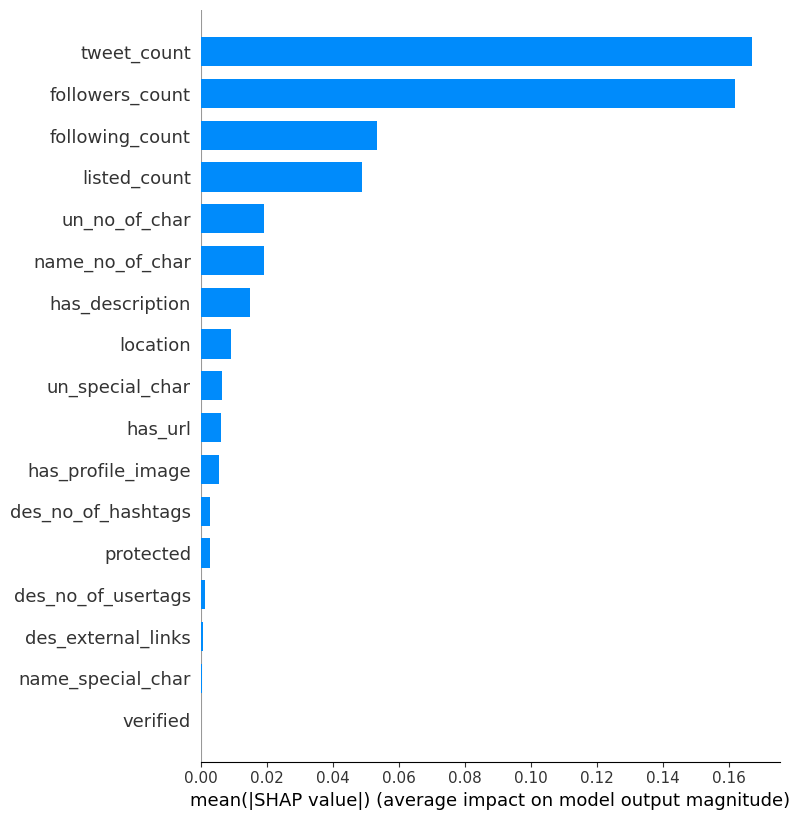

In [38]:
# Global Level
shap_values_global = explainer(x_test)
shap_values_global = shap_values_global[...,1]
shap.summary_plot(shap_values_global, feature_names = x_test.columns, plot_type = "bar", sort = True)